In [1]:
%matplotlib inline
import os
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sl

In [11]:
data = pd.read_csv("~/projects/fb-live-selling/Live_20210128.csv")

In [12]:
data.head(3)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN


In [13]:
data = data[data.columns[:-4]]
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [15]:
data.nunique()

status_id           7050
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

[Text(0.5, 0, 'Status Type'), Text(0, 0.5, 'Count')]

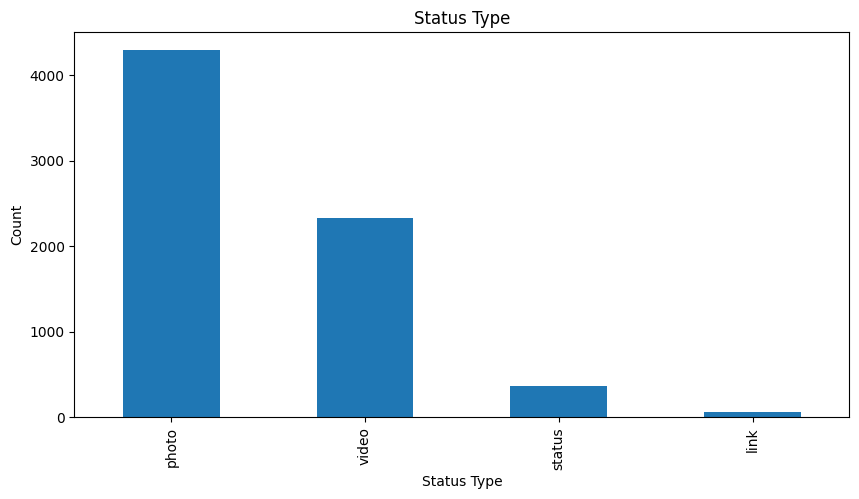

In [17]:
st_ax = data.status_type.value_counts().plot(kind='bar',
                                        figsize=(10,5),
                                        title="Status Type")
st_ax.set(xlabel="Status Type", ylabel="Count")

In [19]:
data['all_reaction_count'] = data.iloc[:,-6:].sum(axis=1)

In [20]:
data['reactio_match'] = data.apply(lambda x: x['num_reactions'] == x['all_reaction_count'],
                                           axis=1)

In [21]:
data_react_mismatch = data[data.reactio_match == False]
data_react_mismatch.shape

(9, 14)

In [22]:
data_react_mismatch["diff_react"] = data_react_mismatch.num_reactions - data_react_mismatch.all_reaction_count

In [23]:
data_react_mismatch

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match,diff_react
238,239,video,6/25/2017 7:42,885,462,26,659,220,0,2,0,0,881,False,4
247,248,photo,6/13/2017 23:17,264,2,0,256,2,5,0,0,0,263,False,1
248,249,photo,6/13/2017 1:31,313,3,0,297,7,6,0,0,0,310,False,3
251,252,photo,6/12/2017 5:08,247,6,0,234,9,1,0,0,0,244,False,3
253,254,photo,6/11/2017 7:04,387,3,0,368,16,1,0,0,0,385,False,2
254,255,photo,6/10/2017 8:19,178,9,0,170,6,0,0,0,0,176,False,2
256,257,photo,6/10/2017 1:08,270,3,0,256,10,3,0,0,0,269,False,1
257,258,photo,6/8/2017 9:26,351,4,1,344,6,0,0,0,0,350,False,1
293,294,video,4/20/2017 2:36,616,523,21,459,125,21,8,0,1,614,False,2


In [24]:
data.num_reactions = data.all_reaction_count

In [25]:
data['reactio_match'] = data.apply(lambda x: x['num_reactions'] == x['all_reaction_count'],
                                           axis=1)

In [26]:
data[data.reactio_match == False]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match


In [27]:
data.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True


In [28]:
data['react_comment_r'] = data.num_reactions/data.num_comments
data['react_share_r'] = data.num_reactions/data.num_shares
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match,react_comment_r,react_share_r
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True,1.033203,2.019084
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True,inf,inf
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,227,True,0.961864,3.982456
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,111,True,inf,inf
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,213,True,inf,inf


<AxesSubplot: >

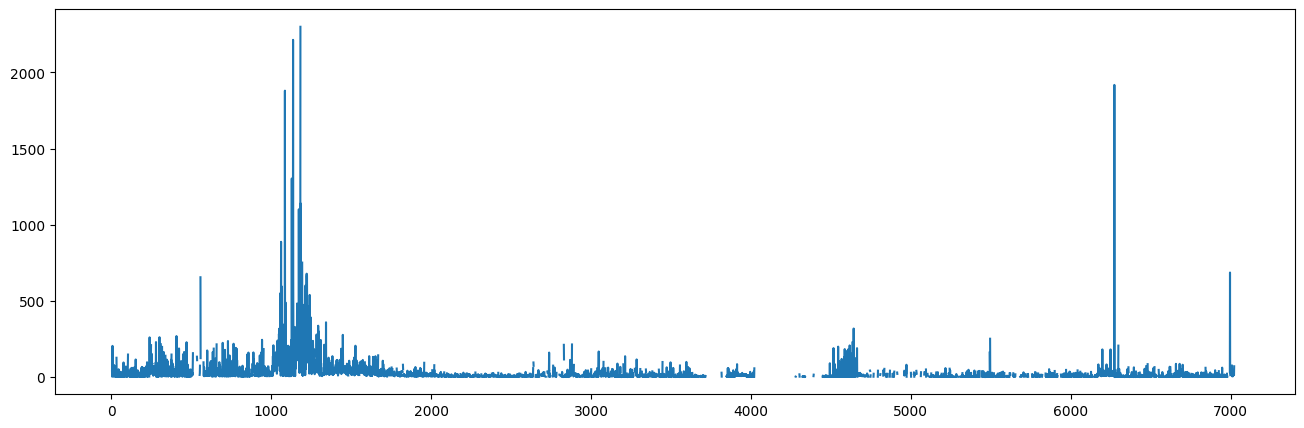

In [30]:
data.react_comment_r.plot(kind='line',
                             figsize=(16,5))

In [31]:
data.replace([np.inf, -np.inf],
                 0.0,
                inplace=True)

In [32]:
data_with_p_reaction = data[(data.react_comment_r > 0) &
        (data.react_comment_r <= 2)]
data_with_p_reaction = data_with_p_reaction[["num_reactions","num_comments","react_comment_r"]]

In [33]:
data_with_p_reaction.shape
data_with_p_reaction.head()

,num_reactions,num_comments,react_comment_r
0,529,512,1.033203
2,227,236,0.961864
6,503,614,0.819218
7,295,453,0.651214
16,135,256,0.527344


In [34]:
data_with_p_reaction.react_comment_r.min(),data_with_p_reaction.react_comment_r.max()

(0.023773207805185926, 2.0)

classify reaction to positive or negative reaction

In [45]:
data['positive_reactions'] = data.iloc[:,-10:-7].sum(axis=1)
data.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match,react_comment_r,react_share_r,positive_reactions
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True,1.033203,2.019084,527
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True,0.000000,0.000000,150


In [46]:
data['negative_reactions'] = data.iloc[:,-8:-5].sum(axis=1)
data.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match,react_comment_r,react_share_r,positive_reactions,negative_reactions
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True,1.033203,2.019084,527,2
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True,0.000000,0.000000,150,0


<AxesSubplot: title={'center': 'Number of Comments v.s Negative Reactions'}, xlabel='num_comments', ylabel='negative_reactions'>

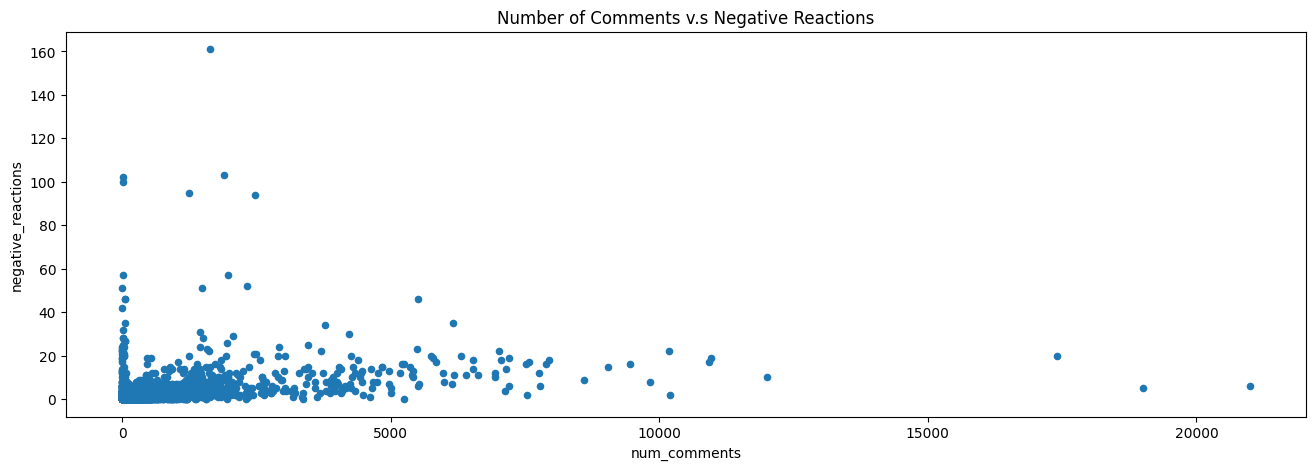

In [47]:
data.plot.scatter(x='num_comments',
                      y='negative_reactions',
                     figsize=(16,5),
                     title="Number of Comments v.s Negative Reactions")

<AxesSubplot: title={'center': 'Number of Comments v.s Positive Reactions'}, xlabel='num_comments', ylabel='positive_reactions'>

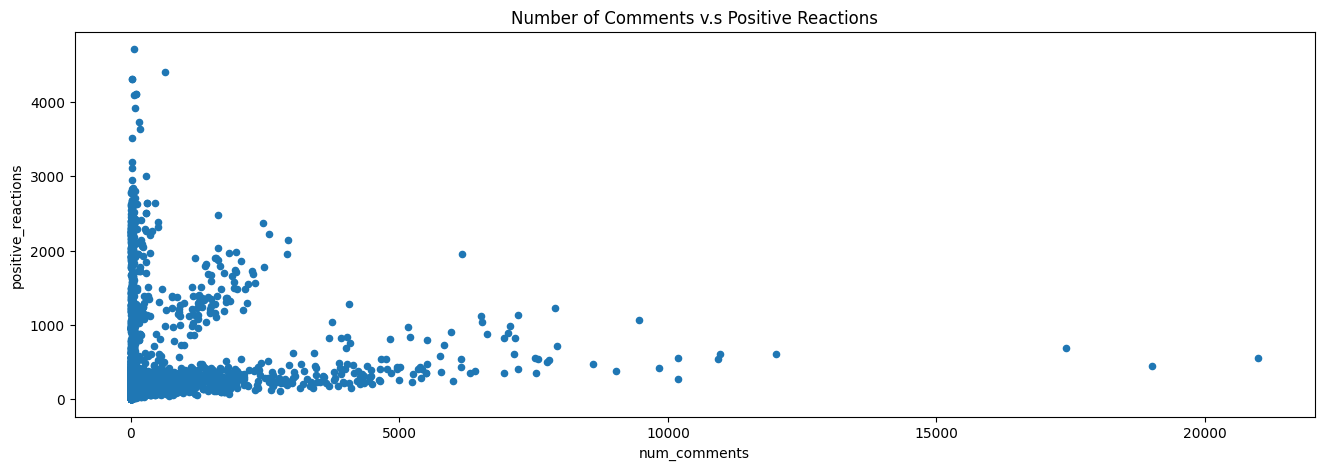

In [48]:
data.plot.scatter(x='num_comments',
                      y='positive_reactions',
                     figsize=(16,5),
                     title="Number of Comments v.s Positive Reactions")

In [50]:
data.num_comments.min(),data.num_comments.max()

(0, 20990)

In [51]:
msk = np.random.rand(len(data)) < 0.8

In [52]:
test = data[~msk]

In [56]:
len(test)

1430

<AxesSubplot: title={'center': 'Number of Comments v.s Negative Reactions'}, xlabel='num_comments', ylabel='negative_reactions'>

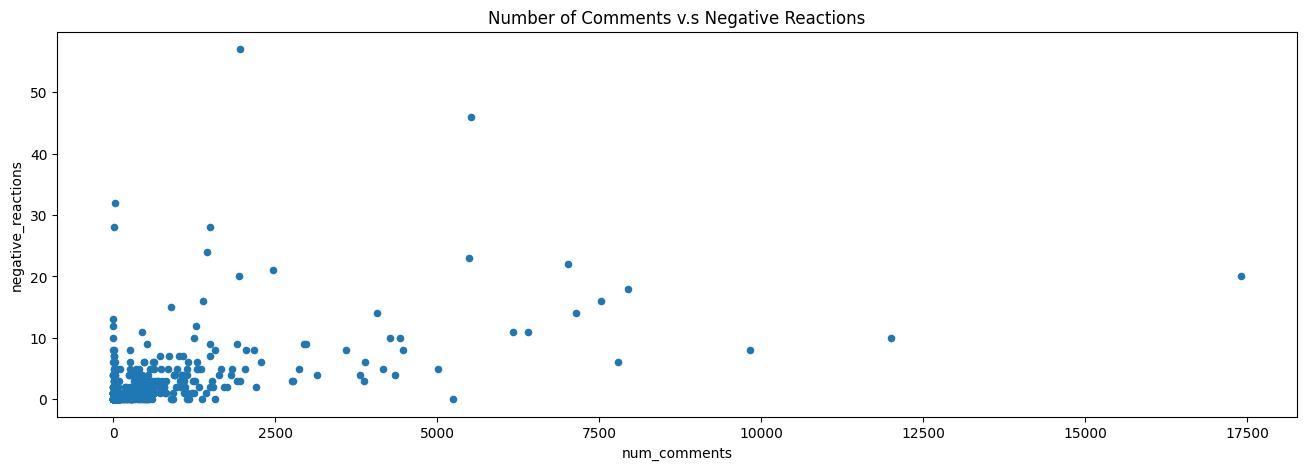

In [57]:
test.plot.scatter(x='num_comments',
                      y='negative_reactions',
                     figsize=(16,5),
                     title="Number of Comments v.s Negative Reactions")

<AxesSubplot: title={'center': 'Number of Comments v.s Positive Reactions'}, xlabel='num_comments', ylabel='positive_reactions'>

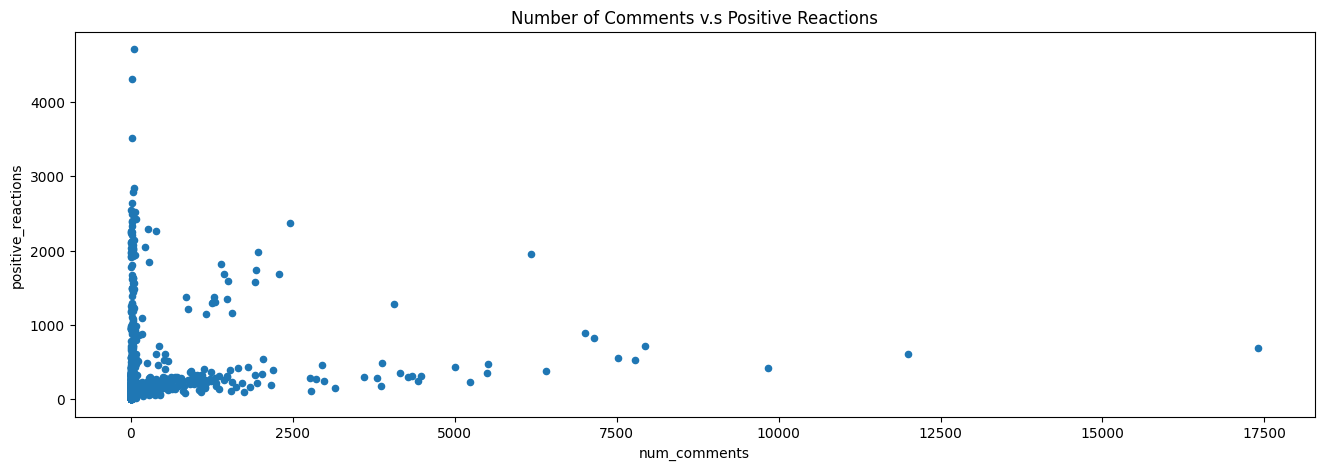

In [58]:
test.plot.scatter(x='num_comments',
                      y='positive_reactions',
                     figsize=(16,5),
                     title="Number of Comments v.s Positive Reactions")

In [59]:
test.num_comments.min(),test.num_comments.max()

(0, 17404)